In [435]:
import numpy as np
import math
import matplotlib.pyplot as plt
import csv

In [436]:
synTrain = np.loadtxt('synth-train.dat', unpack = True)
chiTrain = np.loadtxt('small-prob-train.dat', unpack = True)
synTest = np.loadtxt('synth-test.dat', unpack = True)
chiTest = np.loadtxt('small-prob-test.dat', unpack = True)

In [437]:
# (a)
mS = 100
mC = 9983
suffStatS = [0] * mS
suffStatC = [0] * mC
for i in synTrain:
    suffStatS[int(i-1)] = suffStatS[int(i-1)] + 1
for i in chiTrain:
    suffStatC[int(i-1)] = suffStatC[int(i-1)] + 1
    
for i in [1, 2, 3, 10, 100]:
    print("for synth-train: n" + str(i) + ": " + str(suffStatS[i-1]))
for i in [1, 2, 3, 10, 100]:
    print("for small-prob-train: n" + str(i) + ": " + str(suffStatC[i-1]))

for synth-train: n1: 52
for synth-train: n2: 20
for synth-train: n3: 6
for synth-train: n10: 2
for synth-train: n100: 0
for small-prob-train: n1: 35
for small-prob-train: n2: 12
for small-prob-train: n3: 17
for small-prob-train: n10: 6
for small-prob-train: n100: 3


[84, 8, 3, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


<StemContainer object of 3 artists>

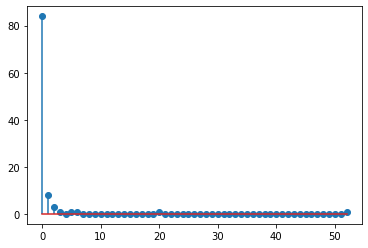

In [438]:
# (b) Get the fingerPrints
uniqS = np.unique(suffStatS)
uniqC = np.unique(suffStatC)
RkS = {}
RkC = {}

# save Rk's of synth-train in RkS and Rk's of small-prob-train in RkC
for i in uniqS:
    RkS[i] = []
for i in range(len(suffStatS)):
    RkS[suffStatS[i]].append(i+1)
for i in uniqC:
    RkC[i] = []
for i in range(len(suffStatC)):
    RkC[suffStatC[i]].append(i+1)

# Get the fingerPrint
fingerprintS = [0] * (mS+1)
fingerprintC = [0] * (mC+1)
for i in RkS:
    fingerprintS[i] = len(RkS[i])
for i in RkC:
    fingerprintC[i] = len(RkC[i])
print(fingerprintS)

# Make Stem-and-leaf plot of the fingerprint rk
x_k_S = [0] * (min(max(uniqS), 100)+1)
x_k_C = [0] * (min(max(uniqC), 100)+1)
y_k_S = [0] * (min(max(uniqS), 100)+1)
y_k_C = [0] * (min(max(uniqC), 100)+1)

for i in range(min(max(uniqS), 100)+1):
    x_k_S[i] = i
    y_k_S[i] = fingerprintS[i]

for i in range(min(max(uniqC), 100)+1):
    x_k_C[i] = i
    y_k_C[i] = fingerprintC[i]
plt.stem(x_k_S, y_k_S, use_line_collection=True)

<StemContainer object of 3 artists>

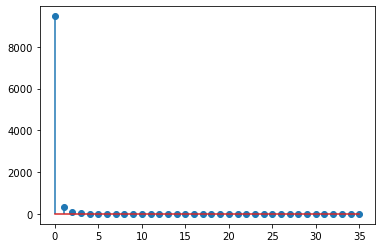

In [439]:
plt.stem(x_k_C, y_k_C, use_line_collection=True)

In [440]:
# (c)
# Get the max Rk*:
maxKS = RkS[max(RkS.keys())]
maxKC = RkC[max(RkC.keys())]
print

for i in [0, 1, 2, 3, 4, 5, 10, 100]:
    print("for synth-train: r" + str(i) + ": " + str(fingerprintS[i]))
for i in [0, 1, 2, 3, 4, 5, 10, 100]:
    print("for small-prob-train: r" + str(i) + ": " + str(fingerprintC[i]))

# check m, n, and r
print("check on m for synth-train: " + str(sum(fingerprintS) == mS))
print("check on m for small-prob-train: " + str(sum(fingerprintC) == mC))
print("check on r for synth-train: " + str((sum(fingerprintS) - fingerprintS[0]) == 16))
print("check on r for small-prob-train: " + str((sum(fingerprintC) - fingerprintC[0]) == 523))
checkn_s = 0
checkn_c = 0
for i in range(mS+1):
    checkn_s = checkn_s + i * fingerprintS[i]
print("check on n for synth-train: " + str(checkn_s == len(synTrain)))
for i in range(mC+1):
    checkn_c = checkn_c + i * fingerprintC[i]
print("check on n for small-prob-train: " + str(checkn_c == len(chiTrain)))

for synth-train: r0: 84
for synth-train: r1: 8
for synth-train: r2: 3
for synth-train: r3: 1
for synth-train: r4: 0
for synth-train: r5: 1
for synth-train: r10: 0
for synth-train: r100: 0
for small-prob-train: r0: 9460
for small-prob-train: r1: 335
for small-prob-train: r2: 103
for small-prob-train: r3: 32
for small-prob-train: r4: 13
for small-prob-train: r5: 17
for small-prob-train: r10: 1
for small-prob-train: r100: 0
check on m for synth-train: True
check on m for small-prob-train: True
check on r for synth-train: True
check on r for small-prob-train: True
check on n for synth-train: True
check on n for small-prob-train: True


In [441]:
# (d)
thetaML_S = []
thetaML_C = []
for i in suffStatS:
    thetaML_S.append(i/len(synTrain))
for i in suffStatC:
    thetaML_C.append(i/len(chiTrain))

for i in [1, 2, 3, 10, 100]:
    print("ML estimates, synth_train: thetaML_" + str(i) + ": " + str(thetaML_S[i-1]))
for i in [1, 2, 3, 10, 100]:
    print("ML estimates, small_prob_train: thetaML_" + str(i) + ": " + str(thetaML_C[i-1]))

ML estimates, synth_train: thetaML_1: 0.52
ML estimates, synth_train: thetaML_2: 0.2
ML estimates, synth_train: thetaML_3: 0.06
ML estimates, synth_train: thetaML_10: 0.02
ML estimates, synth_train: thetaML_100: 0.0
ML estimates, small_prob_train: thetaML_1: 0.035
ML estimates, small_prob_train: thetaML_2: 0.012
ML estimates, small_prob_train: thetaML_3: 0.017
ML estimates, small_prob_train: thetaML_10: 0.006
ML estimates, small_prob_train: thetaML_100: 0.003


In [442]:
# (e)
thetaLap_S = []
thetaLap_C = []

for i in suffStatS:
    thetaLap_S.append((i+1)/(len(synTrain)+mS))
for i in suffStatC:
    thetaLap_C.append((i+1)/(len(chiTrain)+mC))
    
for i in [1, 2, 3, 10, 100]:
    print("Laplace estimates, synth_train: thetaLap_" + str(i) + ": " + str(thetaLap_S[i-1]))
for i in [1, 2, 3, 10, 100]:
    print("Laplace estimates, small_prob_train: thetaLap_" + str(i) + ": " + str(thetaLap_C[i-1]))

Laplace estimates, synth_train: thetaLap_1: 0.265
Laplace estimates, synth_train: thetaLap_2: 0.105
Laplace estimates, synth_train: thetaLap_3: 0.035
Laplace estimates, synth_train: thetaLap_10: 0.015
Laplace estimates, synth_train: thetaLap_100: 0.005
Laplace estimates, small_prob_train: thetaLap_1: 0.0032777929527451517
Laplace estimates, small_prob_train: thetaLap_2: 0.0011836474551579713
Laplace estimates, small_prob_train: thetaLap_3: 0.0016388964763725759
Laplace estimates, small_prob_train: thetaLap_10: 0.0006373486297004461
Laplace estimates, small_prob_train: thetaLap_100: 0.0003641992169716835


In [443]:
# (f)
thetaWB_S = []
thetaWB_C = []

r_s = np.unique(synTrain)
r_c = np.unique(chiTrain)

for i in suffStatS:
    if i > 0:
        thetaWB_S.append(i/(len(r_s)+len(synTrain)))
    else:
        thetaWB_S.append((1/(mS-len(r_s)))*(len(r_s)/(len(synTrain)+len(r_s))))
for i in suffStatC:
    if i > 0:
        thetaWB_C.append(i/(len(r_c)+len(chiTrain)))
    else:
        thetaWB_C.append((1/(mC-len(r_c)))*(len(r_c)/(len(chiTrain)+len(r_c)))) 

for i in [1, 2, 3, 10, 100]:
    print("Witten_Bell estimates, synth_train: thetaWB_" + str(i) + ": " + str(thetaWB_S[i-1]))
for i in [1, 2, 3, 10, 100]:
    print("Witten_Bell estimates, small_prob_train: thetaWB_" + str(i) + ": " + str(thetaWB_C[i-1]))

Witten_Bell estimates, synth_train: thetaWB_1: 0.4482758620689655
Witten_Bell estimates, synth_train: thetaWB_2: 0.1724137931034483
Witten_Bell estimates, synth_train: thetaWB_3: 0.05172413793103448
Witten_Bell estimates, synth_train: thetaWB_10: 0.017241379310344827
Witten_Bell estimates, synth_train: thetaWB_100: 0.0016420361247947454
Witten_Bell estimates, small_prob_train: thetaWB_1: 0.02298095863427446
Witten_Bell estimates, small_prob_train: thetaWB_2: 0.007879185817465528
Witten_Bell estimates, small_prob_train: thetaWB_3: 0.011162179908076166
Witten_Bell estimates, small_prob_train: thetaWB_10: 0.003939592908732764
Witten_Bell estimates, small_prob_train: thetaWB_100: 0.001969796454366382


In [444]:
# (g)
thetaNE_S = []
thetaNE_C = []

sigma = 1

D_s = 0
D_c = 0

for j in suffStatS:
    D_s = D_s + min(j, sigma)
for j in suffStatC:
    D_c = D_c + min(j, sigma)

for j in suffStatS:
    j_ne = j - min(j, sigma) + D_s/mS
    thetaNE_S.append(j_ne / len(synTrain))

for j in suffStatC:
    j_ne = j - min(j, sigma) + D_c/mC
    thetaNE_C.append(j_ne / len(chiTrain))
    
for i in [1, 2, 3, 10, 100]:
    print("Ney-Essen estimates, synth_train: thetaNE_" + str(i) + ": " + str(thetaNE_S[i-1]))
for i in [1, 2, 3, 10, 100]:
    print("Ney-Essen estimates, small_prob_train: thetaNE_" + str(i) + ": " + str(thetaNE_C[i-1]))

Ney-Essen estimates, synth_train: thetaNE_1: 0.5115999999999999
Ney-Essen estimates, synth_train: thetaNE_2: 0.1916
Ney-Essen estimates, synth_train: thetaNE_3: 0.0516
Ney-Essen estimates, synth_train: thetaNE_10: 0.0116
Ney-Essen estimates, synth_train: thetaNE_100: 0.0016
Ney-Essen estimates, small_prob_train: thetaNE_1: 0.03405238906140439
Ney-Essen estimates, small_prob_train: thetaNE_2: 0.011052389061404388
Ney-Essen estimates, small_prob_train: thetaNE_3: 0.01605238906140439
Ney-Essen estimates, small_prob_train: thetaNE_10: 0.005052389061404387
Ney-Essen estimates, small_prob_train: thetaNE_100: 0.0020523890614043876


In [445]:
# (h)
# Get the test data
suffStatSTest = [0] * mS
suffStatCTest = [0] * mC

for i in synTest:
    suffStatSTest[int(i-1)] = suffStatSTest[int(i-1)] + 1
for i in chiTest:
    suffStatCTest[int(i-1)] = suffStatCTest[int(i-1)] + 1

print(len(suffStatCTest))

9983


In [446]:
# (h)
# get the log likelihood

log_Lap_S_Test = 0
log_Lap_C_Test = 0
log_WB_S_Test = 0
log_WB_C_Test = 0
log_NE_S_Test = 0
log_NE_C_Test = 0

for i in range(100):
    log_Lap_S_Test = log_Lap_S_Test + math.log(thetaLap_S[i], 10) * suffStatSTest[i]
    log_WB_S_Test = log_WB_S_Test + math.log(thetaWB_S[i], 10) * suffStatSTest[i]
    log_NE_S_Test = log_NE_S_Test + math.log(thetaNE_S[i], 10) * suffStatSTest[i]
print("For synth-test:")
print("log likelihood for Laplace estimates " + str(log_Lap_S_Test))
print("log likelihood for Witten-Bell estimates " + str(log_WB_S_Test))
print("log likelihood for Ney_Essen estimates " + str(log_NE_S_Test))

for i in range(mC):
#     if thetaML_C[i] != 0:
#         log_ML_C_Test = log_ML_C_Test + math.log(thetaML_C[i], 10) * suffStatCTest[i]
    log_Lap_C_Test = log_Lap_C_Test + math.log(thetaLap_C[i], 10) * suffStatCTest[i]
    log_WB_C_Test = log_WB_C_Test + math.log(thetaWB_C[i], 10) * suffStatCTest[i]
    log_NE_C_Test = log_NE_C_Test + math.log(thetaNE_C[i], 10) * suffStatCTest[i]
print("For small-prob-test:")
print("log likelihood for Laplace estimates " + str(log_Lap_C_Test))
print("log likelihood for Witten-Bell estimates " + str(log_WB_C_Test))
print("log likelihood for Ney_Essen estimates " + str(log_NE_C_Test))

For synth-test:
log likelihood for Laplace estimates -1095.1264514409447
log likelihood for Witten-Bell estimates -978.5000536791971
log likelihood for Ney_Essen estimates -980.0398959244203
For small-prob-test:
log likelihood for Laplace estimates -36099.911455510424
log likelihood for Witten-Bell estimates -33036.50808168716
log likelihood for Ney_Essen estimates -34129.59307559625


In [447]:
# (f)
log_ML_S_Train = 0
log_ML_C_Train = 0
log_Lap_S_Train = 0
log_Lap_C_Train = 0
log_WB_S_Train = 0
log_WB_C_Train = 0
log_NE_S_Train = 0
log_NE_C_Train = 0

for i in range(mS):
    if thetaML_S[i] != 0:
        log_ML_S_Train = log_ML_S_Train + math.log(thetaML_S[i], 10) * suffStatS[i]
    log_Lap_S_Train = log_Lap_S_Train + math.log(thetaLap_S[i], 10) * suffStatS[i]
    log_WB_S_Train = log_WB_S_Train + math.log(thetaWB_S[i], 10) * suffStatS[i]
    log_NE_S_Train = log_NE_S_Train + math.log(thetaNE_S[i], 10) * suffStatS[i]
print("For synth-train:")
print("log likelihood for ML estimates " + str(log_ML_S_Train))
print("log likelihood for Laplace estimates " + str(log_Lap_S_Train))
print("log likelihood for Witten-Bell estimates " + str(log_WB_S_Train))
print("log likelihood for Ney_Essen estimates " + str(log_NE_S_Train))

for i in range(mC):
    if thetaML_C[i] != 0:
        log_ML_C_Train = log_ML_C_Train + math.log(thetaML_C[i], 10) * suffStatC[i]
    log_Lap_C_Train = log_Lap_C_Train + math.log(thetaLap_C[i], 10) * suffStatC[i]
    log_WB_C_Train = log_WB_C_Train + math.log(thetaWB_C[i], 10) * suffStatC[i]
    log_NE_C_Train = log_NE_C_Train + math.log(thetaNE_C[i], 10) * suffStatC[i]
print("For small-prob-train:")
print("log likelihood for ML estimates " + str(log_ML_C_Train))
print("log likelihood for Laplace estimates " + str(log_Lap_C_Train))
print("log likelihood for Witten-Bell estimates " + str(log_WB_C_Train))
print("log likelihood for Ney_Essen estimates " + str(log_NE_C_Train))

For synth-train:
log likelihood for ML estimates -73.34592495558599
log likelihood for Laplace estimates -97.95777649286123
log likelihood for Witten-Bell estimates -79.79172387827788
log likelihood for Ney_Essen estimates -83.09326813024674
For small-prob-train:
log likelihood for ML estimates -2562.8680477688868
log likelihood for Laplace estimates -3433.283745337519
log likelihood for Witten-Bell estimates -2745.567951104914
log likelihood for Ney_Essen estimates -3089.129985709385


In [448]:
# (j)
log_ML_S_Test = 0
log_ML_C_Test = 0
for i in range(mS):
    if thetaML_S[i] != 0:
        log_ML_S_Test = log_ML_S_Test + np.log10(thetaML_S[i]) * suffStatSTest[i]
for i in range(mC):
    if thetaML_C[i] != 0:
        log_ML_C_Test = log_ML_C_Test + np.log10(thetaML_C[i]) * suffStatCTest[i]

print(log_ML_S_Test)
print(log_ML_C_Test)

-606.6640631674043
-15810.531416593582


In [479]:
# Write to csv file
# np.format_float_scientific(thetaML)
# suffStatS = [{:e}.format(i) for i in suffStatS]
# suffStatC = ['{:e}'.format(i) for i in suffStatC]
# thetaML_S = ['{:e}'.format(i) for i in thetaML_S]
# thetaML_C = ['{:e}'.format(i) for i in thetaML_C]
# fingerprintS = ['{:e}'.format(i) for i in fingerprintS]
# fingerprintC = ['{:e}'.format(i) for i in fingerprintC]
# thetaLap_S = ['{:e}'.format(i) for i in thetaLap_S]
# thetaLap_C = ['{:e}'.format(i) for i in thetaLap_C]
# thetaWB_S = ['{:e}'.format(i) for i in thetaWB_S]
# thetaWB_C = ['{:e}'.format(i) for i in thetaWB_C]
# thetaNE_S = ['{:e}'.format(i) for i in thetaNE_S]
# thetaNE_C = ['{:e}'.format(i) for i in thetaNE_C]

# log_Lap_S_Test = "{:.4e}".format(log_Lap_S_Test)
# log_WB_S_Test = "{:.4e}".format(log_WB_S_Test)
# log_NE_S_Test = "{:.4e}".format(log_NE_S_Test)
# log_ML_S_Train = "{:.4e}".format(log_ML_S_Train)
# log_Lap_S_Train = "{:.4e}".format(log_Lap_S_Train)
# log_WB_S_Train = "{:.4e}".format(log_WB_S_Train)
# log_NE_S_Train = "{:.4e}".format(log_NE_S_Train)

# log_Lap_C_Test = "{:.4e}".format(log_Lap_C_Test)
# log_WB_C_Test = "{:.4e}".format(log_WB_C_Test)
# log_NE_C_Test = "{:.4e}".format(log_NE_C_Test)
# log_ML_C_Train = "{:.4e}".format(log_ML_C_Train)
# log_Lap_C_Train = "{:.4e}".format(log_Lap_C_Train)
# log_WB_C_Train = "{:.4e}".format(log_WB_C_Train)
# log_NE_C_Train = "{:.4e}".format(log_NE_C_Train)

# print(fingerprintS)
# print(log_Lap_S_Test)

# with open("hw3-myanswers-synth.csv", "w", encoding="UTF-8") as f:
#     f.write("counts_n_1:m" + ",".join(i for i in suffStatS)+"\n")
#     f.write("fingerprint_r_1:n" + ",".join(i for i in fingerprintS)+"\n")
#     f.write("thetaML_1:n" + ",".join(i for i in thetaML_S)+"\n")
#     f.write("thetaLap_1:n" + ",".join(i for i in thetaLap_S)+"\n")
#     f.write("thetaWB_1:n" + ",".join(i for i in thetaWB_S)+"\n")
#     f.write("thetaNE_1:n" + ",".join(i for i in thetaNE_S)+"\n")

print(log_Lap_C_Test + "\n" + 
log_WB_C_Test + "\n" + 
log_NE_C_Test + "\n" + 
log_ML_C_Train + "\n" + 
log_Lap_C_Train + "\n" + 
log_WB_C_Train + "\n" + 
log_NE_C_Train + "\n")

-3.6100e+04
-3.3037e+04
-3.4130e+04
-2.5629e+03
-3.4333e+03
-2.7456e+03
-3.0891e+03



In [473]:
print(thetaNE_C)

['3.405239e-02', '1.105239e-02', '1.605239e-02', '1.005239e-02', '1.205239e-02', '4.052389e-03', '7.052389e-03', '7.052389e-03', '1.605239e-02', '5.052389e-03', '5.052389e-03', '8.052389e-03', '5.052389e-03', '4.052389e-03', '2.052389e-03', '7.052389e-03', '7.052389e-03', '3.052389e-03', '1.052389e-03', '5.052389e-03', '4.052389e-03', '4.052389e-03', '5.052389e-03', '1.052389e-03', '5.238906e-05', '6.052389e-03', '2.052389e-03', '2.052389e-03', '4.052389e-03', '4.052389e-03', '9.052389e-03', '4.052389e-03', '3.052389e-03', '2.052389e-03', '1.052389e-03', '1.052389e-03', '5.238906e-05', '5.052389e-03', '4.052389e-03', '5.052389e-03', '1.052389e-03', '1.052389e-03', '5.238906e-05', '1.052389e-03', '3.052389e-03', '2.052389e-03', '2.052389e-03', '1.052389e-03', '1.052389e-03', '1.052389e-03', '6.052389e-03', '1.052389e-03', '3.052389e-03', '5.238906e-05', '1.052389e-03', '4.052389e-03', '1.052389e-03', '5.238906e-05', '5.238906e-05', '5.238906e-05', '1.052389e-03', '1.052389e-03', '5.2389